In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os;

In [2]:
os.chdir('C:\\Users\\Akriti Goenka\\OneDrive - OPTIMAL STRATEGIX GROUP INC\\Mintel\\Mintel')
Mintel = pd.read_excel('Mintel PI GNPD Combined Data 2017 - no formulas (3).xlsx', header=2)

In [3]:
#removing NaN values,imputing it with 0
Mintel=Mintel.fillna(0)

In [4]:
Mintel.columns.values

array(['Core Product', 'Sales Data Available', 'Pack ID', 'Record ID',
       'Product', 'Product Variant', 'Number of Variants', 'Brand',
       'Company', 'Ultimate Company', 'Company county/State',
       'Private Label', 'Country', 'Date Published', 'Super-Category',
       'Category', 'Sub-Category', 'Product source', 'Format Type',
       'Storage', 'Launch Type', 'Price in US Dollars', 'Currency',
       'Price in local currency', 'Package Type', 'Package Material',
       'Flavours', 'Flavour Group', 'Flavour Subgroup',
       'Number of units in multipack', 'Packaging Units',
       'Total Pack Size (ml/g)', 'Unit Pack Size (ml/g)',
       'Price_per_g_ml', 'Import Status', 'Country of Manufacture',
       'Store Name', 'Ingredient 1', 'Ingredient 2', 'Ingredient 3',
       'Ingredient 4', 'Ingredient 5', 'Ingredient 6', 'Ingredient 7',
       'Ingredient 8', 'Ingredient 9', 'Ingredient 10', 'Ingredient 11',
       'Ingredient 12', 'Ingredient 13', 'Ingredient 14', 'Ingredient

### Test Train Split

In [7]:
#Train test Split

def Train_Test_Split(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    X_train=X_train.fillna(0)
    X_test=X_test.fillna(0)
    y_train=y_train.fillna(0)
    y_test=y_test.fillna(0)
    return X_train, y_train, X_test, y_test

### Linear Regression

In [8]:
#Linear Regression Function

def Linear_Regression(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    # Train the model
    lm.fit(X_train,y_train)
    #print(summary(lm))
    # The coefficients
    print("Coefficients")
    coeff = np.array([(X_train.columns.values),(lm.coef_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","Coeff"))
    coeff=coeff.sort_values(by=['Coeff'])
    print(coeff)
    predictions = lm.predict( X_test)
    # Validate the model
    plt.scatter(y_test,predictions)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    # Validation
    from sklearn import metrics
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R-square: ', metrics.r2_score(y_test, predictions))

### Decision Tree Regressor

In [9]:
def Decision_Tree_r(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn.tree import DecisionTreeRegressor
    from sklearn import tree
    dtree = DecisionTreeRegressor()
    dtree.fit(X_train,y_train)
    #Test Model
    predictions = dtree.predict(X_test)
    # Plot the results
    plt.figure()
    #plt.scatter(X_test, predictions, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X_test, predictions, color="cornflowerblue", label="dtree", linewidth=2)
    #plt.plot(X_test, y_test, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    #Validation
    #from sklearn.metrics import Regressor_report,confusion_matrix
    #print(Regression_report(y_test,predictions))
    

## Standardize

In [10]:
def mean(x):
    z=np.mean(x, axis=0)
    return z

In [11]:
def std_dev(x):
    a=mean(x)
    b=np.std(a,ddof=1)
    return b

In [12]:
def standardize(x):
    Xs=(x-mean(x))/std_dev(x)
    return Xs

## Normalize array

In [13]:
def Normalize_list(x):
    y = x
    for i in range(0,len(x)):
        y[i] = ((x[i] - min(x)) / (max(x) - min(x)))
   
    return y

### Ridge Regression

In [343]:
def RidgeRegression(X,y):
    X=X.apply(pd.to_numeric,errors='coerce')
    y=y.apply(pd.to_numeric,errors='coerce')
    X=X.fillna(0)
    y=y.fillna(0)
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    #ridge regression
    from sklearn.linear_model import Ridge
    from sklearn.metrics import r2_score
    reg = Ridge (alpha = 1, normalize=True)
    y_pred_ridge = reg.fit(X_train, y_train).predict(X_test)
    r2_score_ridge = r2_score(y_test, y_pred_ridge)
    print(reg,"\n")
    print("r^2 on test data : %f" % r2_score_ridge,"\n")
    print("Intercept: ",reg.intercept_,"\n")
    print("Coefficients")
    coeff = np.array([(X_train.columns.values),(reg.coef_)])
    #coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","Coeff"))
    col=["Variables","Coeff"]
    coeff1=pd.DataFrame(coeff.transpose(),columns=col)
    coeff=coeff1.sort_values(by=['Coeff'])
    print(coeff)

In [421]:
def Bayes_ridge(X,y):
    X=X.apply(pd.to_numeric,errors='coerce')
    y=y.apply(pd.to_numeric,errors='coerce')
    X=X.fillna(0)
    y=y.fillna(0)
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn import linear_model
    from sklearn.metrics import r2_score
    reg = linear_model.BayesianRidge()
    y_pred_ridge = reg.fit(X_train, y_train).predict(X_test)
    r2_score_ridge = r2_score(y_test, y_pred_ridge)
    print(reg,"\n")
    print("r^2 on test data : %f" % r2_score_ridge,"\n")
    print("Intercept: ",reg.intercept_,"\n")
    print("Coefficients")
    coeff = np.array([(X_train.columns.values),(reg.coef_)])
    #coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","Coeff"))
    col=["Variables","Coeff"]
    coeff1=pd.DataFrame(coeff.transpose(),columns=col)
    coeff=coeff1.sort_values(by=['Coeff'])
    print(coeff)

### Validate

In [15]:
def validate(reg):
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import recall_score
    scoring = ['precision_macro', 'recall_macro']
    #clf = svm.SVC(kernel='linear', C=1, random_state=0)
    scores = cross_validate(reg, iris.data, iris.target, scoring=scoring,
                        cv=5, return_train_score=False)

### Lasso

In [16]:
def Lasso_r(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    # Lasso
    from sklearn.linear_model import Lasso
    from sklearn.metrics import r2_score
    alpha = 1
    lasso = Lasso(alpha=alpha, normalize=True)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    print(lasso,"\n")
    print("r^2 on test data : %f" % r2_score_lasso,"\n")
    #print(lasso.coef_)
    print("Intercept: ",lasso.intercept_,"\n")
    print("Coefficients")
    coeff = np.array([(X_train.columns.values),(lasso.coef_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","Coeff"))
    coeff=coeff.sort_values(by=['Coeff'])
    #coeff=[(X_train.columns.values),(lasso.coef_)]
    #coeff=coeff.transpose() #if we can do this, Our problem might get solved
    print(coeff)

### Neural Network

In [17]:
def Neural_net(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    #Using Tensor Flow
    import tensorflow.contrib.learn.python.learn as learn
    #DNN Classifier
    classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3)#,feature_columns=feature_columns)
    classifier.fit(X_train, y_train, steps=200, batch_size=32)
    Output = classifier.predict(X_test)
    #Validation
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test,Output)) 

### Logit

In [18]:
def Logit_old(X,y):
    from sklearn import datasets
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    import statsmodels.api as sm
    #Implementation of Logit Model
    logit_Model= sm.Logit(y,X)
    final= logit_Model.fit()
    print(final.summary())
    #for ML, optional training TBD
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    from sklearn import model_selection
    from sklearn.model_selection import cross_val_score
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'Accuracy'
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    print("10-fold cross validation average accuracy score: %.3f" % (results.mean()))

### SVM_SVC

In [19]:
def SVM_SVC(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn.svm import SVC
    svc_model = SVC()
    svc_model.fit(X_train,y_train)
    #Test Model
    predictions = svc_model.predict(X_test)
    #Validation
    from sklearn.metrics import classification_report,confusion_matrix
    print(confusion_matrix(y_test,predictions))

### SVM_SVR

In [20]:
def SVM_SVR(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn.svm import SVR
    svR_model = SVR()
    svR_model.fit(X_train,y_train)
    #Test Model
    predictions = svR_model.predict(X_test)
    #Validation
    #from sklearn.metrics import classification_report,confusion_matrix
    #print(confusion_matrix(y_test,predictions))

### Decision_tree

In [21]:
def Decision_Tree_c(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    #Test Model
    predictions = dtree.predict(X_test)
    # Plot the results
    plt.figure()
    #plt.scatter(X_test, predictions, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X_test, predictions, color="cornflowerblue", label="dtree", linewidth=2)
    #plt.plot(X_test, y_test, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Classifier")
    plt.legend()
    plt.show()
    #Validation
    from sklearn.metrics import classification_report,confusion_matrix
    print(confusion_matrix(y_test,predictions))

### Random Forest

In [316]:
#Random Forest
def Random_Forest_Classifier(X,y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X,y)
    print(clf)
    predictions = clf.predict(X_test)
    print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
    print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
    print(" Confusion matrix: \n ", confusion_matrix(y_test, predictions))

## RFE

In [22]:
#RFE feature selection
def RFE(X,y,n):
    X=X.apply(pd.to_numeric,errors='coerce')
    y=y.apply(pd.to_numeric,errors='coerce')
    X=X.fillna(0)
    y=y.fillna(0)
    from sklearn import datasets
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    rfe = RFE(logreg, n)
    rfe = rfe.fit(X, y )
    print('rfe.support_')
    coeff = np.array([(X.columns.values),(rfe.support_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","support"))
    print(coeff)
    print('rfe.ranking_') 
    coeff = np.array([(X.columns.values),(rfe.ranking_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","ranking"))
    coeff=coeff.sort_values(by=['ranking'])
    print(coeff)
    return coeff.iloc[:n] 

### Normalize

In [23]:
# Normalize the data attributes.
def normalize (X):
    from sklearn import preprocessing
    # normalize the data attributes
    X = X.reshape((len(X), 1))
    normalized_X = preprocessing.normalize(X)

### Categorical to dummy and remove unwanted columns

In [24]:
def to_use_data(data, to_dummy, to_remove=''):
    cat_vars=to_dummy
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1 
    cat_vars=to_dummy
    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    data_final=data[to_keep] 
    cat_vars=to_remove
    data_vars=data_final.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    data_final=data[to_keep]
    data_final.columns.values
    return data_final

### RFE_Ridge

In [25]:
def RFE_Ridge(X,y):
    results = RFE(X,y,20)
    cols = results['Variables'].tolist()
    cols 
    X1=X[cols]
    RidgeRegression(X1,y)

### Decision Tree

In [142]:
X_train, y_train, X_test, y_test=Train_Test_Split(X,y)

In [303]:
'''#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)'''

'#Decision Tree\nfrom sklearn.tree import DecisionTreeClassifier\ndtree = DecisionTreeClassifier()\ndtree.fit(X_train,y_train)'

In [ ]:
#Getting features
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_Data[cols])
features

In [ ]:
#Test Model
predictions = dtree.predict(X_test)

In [ ]:
#Validation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Train Accuracy :: ", accuracy_score(y_train, dtree.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))


In [ ]:
#Plotting the tree

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

### Decision Tree Regression

In [155]:
X_train, y_train, X_test, y_test=Train_Test_Split(X,y)

In [156]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [157]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [158]:
# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


No handles with labels found to put in legend.


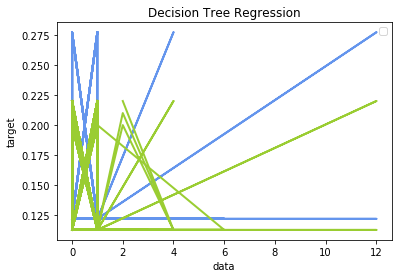

In [167]:
# Plot the results
plt.figure()
#plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",  linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### LOGIT

In [135]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)
y_train=y_train.fillna(0)
y_test=y_test.fillna(0)

In [136]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
#Test Model
predictions = logmodel.predict(X_test)

In [ ]:
#Validation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

### PLS

In [505]:
def PLS(X,y,col):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    from sklearn.cross_decomposition import PLSRegression
    pls2 = PLSRegression(n_components=2)
    pls2.fit(X, y) 
    Y_pred = pls2.predict(X)
    X_train_r, Y_train_r = pls2.transform(X_train, y_train)
    X_test_r, Y_test_r = pls2.transform(X_test, y_test)
    print('R-square: ',pls2.score(X_test,y_test))
    #arr=pd.DataFrame(X_train_r,columns=('actual','predicted'))
    #print(arr)
    print("Coefficients: ")
    #print(pls2.coef_)
    coeff=pd.DataFrame(pls2.coef_,columns=col,index=X.columns.values)
    print(coeff)

# -------------------------------------------------------

### For Snacks Category

In [506]:
snacks=Mintel.loc[Mintel['Category']=='Snacks']

ysnacks=snacks['Total Sales (units)']
xsnacks=to_use_data(snacks,to_dummy,to_remove)

In [507]:
snacks_data=snacks[['Core Product', 
       'Product', 'Product Variant', 'Number of Variants', 'Brand', 'Category', 'Sub-Category',
        'Launch Type', 'Package Type','Flavours', 'Flavour Group', 'Flavour Subgroup',
         'Number of units in multipack','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for',
       'Free from', 'Beauty enhancing','Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)','Average Weekly Sales (units)']]

### For Dairy Category

In [508]:
dairy=Mintel.loc[Mintel['Category']=='Dairy']
ydairy=dairy['Total Sales (units)']
xdairy=to_use_data(dairy,to_dummy,to_remove)

In [509]:
dairy_data=dairy[['Core Product', 
       'Product', 'Product Variant', 'Number of Variants', 'Brand', 'Category', 'Sub-Category',
        'Launch Type', 'Package Type','Flavours', 'Flavour Group', 'Flavour Subgroup',
         'Number of units in multipack','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for',
       'Free from', 'Beauty enhancing','Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)','Average Weekly Sales (units)']]

## For sports and energy drinks

In [510]:
Sports_Energy_drinks=Mintel.loc[Mintel['Category']=='Sports & Energy Drinks']
ysed=Sports_Energy_drinks['Total Sales (units)']
xsed=to_use_data(Sports_Energy_drinks,to_dummy,to_remove)

In [511]:
SED_data=Sports_Energy_drinks[['Core Product', 
       'Product', 'Product Variant', 'Number of Variants', 'Brand', 'Category', 'Sub-Category',
        'Launch Type', 'Package Type','Flavours', 'Flavour Group', 'Flavour Subgroup',
         'Number of units in multipack','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for',
       'Free from', 'Beauty enhancing','Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)','Average Weekly Sales (units)']]

### For Bakery Category

In [512]:
bakery=Mintel.loc[Mintel['Category']=='Bakery']
ybakery=bakery['Total Sales (units)']
xbakery=to_use_data(bakery,to_dummy,to_remove)

In [513]:
bakery_data=bakery[['Core Product', 
       'Product', 'Product Variant', 'Number of Variants', 'Brand', 'Category', 'Sub-Category',
        'Launch Type', 'Package Type','Flavours', 'Flavour Group', 'Flavour Subgroup',
         'Number of units in multipack','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for',
       'Free from', 'Beauty enhancing','Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)','Average Weekly Sales (units)']]

In [514]:
#RFE_Ridge(xsnacks,ysnacks)#

In [515]:
'''#Data Cleaning
data = feb_2018[feb_2018['Gender'].isin(['M', 'F'])]
data = data[data['Nationality'].isin(['India. Republic of','United Arab Emirates','Pakistan. Islamic Republic of','Jordan. Hashemite Kingdom of','Egypt. Arab Republic of','Philippines. Republic of the','Syrian Arab Republic','Palestinian Territory. Occupied','Sudan. Republic of','Lebanon. Lebanese Republic'])]
data = data[data['Marital_status'].isin(['Married','Unmarried','Divorced','Widowed'])]
data = data[data['Emirates'].isin(['ABU DHABI','DUBAI','SHARJAH','UMM AL QUWAIN', 'AJMAN', 'FUJAIRAH', 'RAS AL KHAIMAH'])]'''

"#Data Cleaning\ndata = feb_2018[feb_2018['Gender'].isin(['M', 'F'])]\ndata = data[data['Nationality'].isin(['India. Republic of','United Arab Emirates','Pakistan. Islamic Republic of','Jordan. Hashemite Kingdom of','Egypt. Arab Republic of','Philippines. Republic of the','Syrian Arab Republic','Palestinian Territory. Occupied','Sudan. Republic of','Lebanon. Lebanese Republic'])]\ndata = data[data['Marital_status'].isin(['Married','Unmarried','Divorced','Widowed'])]\ndata = data[data['Emirates'].isin(['ABU DHABI','DUBAI','SHARJAH','UMM AL QUWAIN', 'AJMAN', 'FUJAIRAH', 'RAS AL KHAIMAH'])]"

#### Sports and energy drink

In [516]:
#Converting to dummies
cat_vars=['Core Product', 'Product','Brand']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(SED_data[var], prefix=var)
    data1=SED_data.join(cat_list)
    data=data1
cat_vars=['Launch Type','Package Type','Flavours','Flavour Group','Flavour Subgroup','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for', 'Free from', 'Beauty enhancing']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(SED_data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [517]:
#Keeping only dummies and removing the categorical variables
cat_vars=['Core Product',  'Product','Brand','Launch Type','Package Type','Flavours','Flavour Group','Flavour Subgroup','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for', 'Free from', 'Beauty enhancing','Category','Product Variant','Sub-Category']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [518]:
#Data after creation of dummies
X_Data=data[to_keep]

In [519]:
#Defining X and y
y = X_Data['Tasty - 5: Looks very tasty']
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [520]:
#Converting string to numeric
X=X.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')  
X = X.fillna(0)

In [521]:
Bayes_ridge(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 

r^2 on test data : -0.609051 

Intercept:  0.1196625336466866 

Coefficients
                                             Variables      Coeff
69                                    Package Type_Jar -0.0650636
86                                     Flavours_Citrus -0.0411747
132                         Flavours_Unflavoured/Plain -0.0385848
22                                  Brand_H-E-B Quench -0.0362661
225              Positioning Claims_Other (Functional) -0.0351704
243                          Claim Category_Functional -0.0351704
97                                 Flavours_Grapefruit -0.0284282
104                               Flavours_Lemon, Lime -0.0264394
96             Flavours_Grape (White/Green), Raspberry  -0.025826
64                                Launch Type_Relaunch -0.0247

In [522]:
RidgeRegression(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.362704 

Intercept:  0.1299972277514902 

Coefficients
                                             Variables      Coeff
225              Positioning Claims_Other (Functional) -0.0208525
243                          Claim Category_Functional -0.0208525
287  Claim Category_Suitable for, Ethical & environ... -0.0196082
179  Positioning Claims_Kosher, Ethical - Environme... -0.0196082
187            Positioning Claims_Kosher, Social Media -0.0192283
34                                     Brand_NOS Rowdy -0.0192283
263                             Claim Category_Natural -0.0186745
46                    Brand_Scheckter's Organic Energy -0.0186745
212  Positioning Claims_No Additives/Preservatives,... -0.0186745
188  Positioning Claims_Kosher, Vitamin/Mineral For...   -0.01798
293                  Claim Category_Suitable for, Plus   -0.01798
43 

In [523]:
#Defining X and y
y = X_Data['Purchase Intent - T2B']
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [524]:
Bayes_ridge(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 

r^2 on test data : -0.001878 

Intercept:  0.26634864345075043 

Coefficients
                                             Variables      Coeff
69                                    Package Type_Jar -0.0776507
86                                     Flavours_Citrus -0.0686686
131                           Flavours_Tropical, Mango -0.0636433
132                         Flavours_Unflavoured/Plain -0.0614499
103                                     Flavours_Lemon -0.0520772
227  Positioning Claims_Other (Functional), Gluten-... -0.0429672
36                         Brand_PowerBar Simple Fruit -0.0429672
187            Positioning Claims_Kosher, Social Media -0.0392915
34                                     Brand_NOS Rowdy -0.0392915
225              Positioning Claims_Other (Functional) -0.037

In [525]:
RidgeRegression(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.363363 

Intercept:  0.30484854054237803 

Coefficients
                                             Variables      Coeff
77                     Flavours_Apple, Pear, Raspberry -0.0503439
187            Positioning Claims_Kosher, Social Media  -0.042707
34                                     Brand_NOS Rowdy  -0.042707
69                                    Package Type_Jar -0.0419123
227  Positioning Claims_Other (Functional), Gluten-... -0.0414037
36                         Brand_PowerBar Simple Fruit -0.0414037
131                           Flavours_Tropical, Mango -0.0408723
263                             Claim Category_Natural -0.0349541
46                    Brand_Scheckter's Organic Energy -0.0349541
212  Positioning Claims_No Additives/Preservatives,... -0.0349541
76                       Flavours_Apple, Orange, Lemon  -0.031374
55

In [526]:
#Defining X and y
y = X_Data[['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)']]
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [527]:
PLS(X,y,y.columns.values)

R-square:  0.8369695052486985
Coefficients: 
                                                    Tasty - 5: Looks very tasty  \
Number of Variants                                                     0.002423   
Number of units in multipack                                           0.002371   
Average Weekly Sales (units)                                           0.000684   
Brand_7 Select                                                        -0.000596   
Brand_AMP Energy                                                      -0.000574   
Brand_Amp Energy                                                      -0.000956   
Brand_Aspire                                                           0.001629   
Brand_BeeBad                                                          -0.000266   
Brand_BodyArmor Lyte SuperDrink                                        0.000889   
Brand_BodyArmor SuperDrink                                            -0.000758   
Brand_Cafecito                            

#### Snacks

In [528]:
#Converting to dummies
cat_vars=['Core Product', 'Product','Brand']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(snacks_data[var], prefix=var)
    data1=snacks_data.join(cat_list)
    data=data1
cat_vars=['Launch Type','Package Type','Flavours','Flavour Group','Flavour Subgroup','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for', 'Free from', 'Beauty enhancing']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(snacks_data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [529]:
data.columns.values

array(['Core Product', 'Product', 'Product Variant', ...,
       'Free from_Hormone Free, Dairy Free', 'Beauty enhancing_0',
       'Beauty enhancing_Anti-Ageing'], dtype=object)

In [530]:
#Keeping only dummies and removing the categorical variables
cat_vars=['Core Product',  'Product','Brand','Launch Type','Package Type','Flavours','Flavour Group','Flavour Subgroup','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for', 'Free from', 'Beauty enhancing','Category','Product Variant','Sub-Category']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [531]:
#Data after creation of dummies
X_Data=data[to_keep]

In [532]:
#Defining X and y
y = X_Data[['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)']]
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [533]:
#Converting string to numeric
X=X.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')  
X = X.fillna(0)

In [534]:
PLS(X,y,y.columns.values)

R-square:  0.8065789017408022
Coefficients: 
                                                    Tasty - 5: Looks very tasty  \
Number of Variants                                                     0.001013   
Number of units in multipack                                           0.000277   
Average Weekly Sales (units)                                           0.002583   
Brand_180                                                              0.000252   
Brand_4505                                                            -0.000535   
Brand_18 Rabbits Jr. Organics                                          0.000120   
Brand_180° Snacks                                                      0.000015   
Brand_22 Days Nutrition                                               -0.000512   
Brand_365 Everyday Value                                              -0.000178   
Brand_365 Everyday Value Organic                                       0.000011   
Brand_365 Everyday Value PB & J Bites     

In [535]:
y = X_Data['Tasty - 5: Looks very tasty']
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [536]:
Bayes_ridge(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 

r^2 on test data : 0.314684 

Intercept:  0.15186781980497668 

Coefficients
                                              Variables      Coeff
881                                           Brand_Utz -0.0279827
488                                        Brand_Meijer -0.0247236
308                                   Brand_Great Value -0.0242029
585                      Brand_Oatmega Nutrition Shared -0.0237854
2324                    Flavour Group_Fruit & Vegetable  -0.021751
5341  Suitable for_Gluten Free, Low/No/Reduced Aller... -0.0211923
5292                          Natural_Organic, GMO Free -0.0207601
2802                         Flavour Subgroup_Hardshell -0.0203973
319                                Brand_H-E-B Organics -0.0199416
296                              Brand_Goodfields Se

In [537]:
RidgeRegression(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.306056 

Intercept:  0.18147176192904246 

Coefficients
                                              Variables      Coeff
617                               Brand_Pampanga’s Best -0.0773147
138                             Brand_Chocolate by Fika -0.0655524
1201         Flavours_Cheese (Emmental), Tomato, Garlic  -0.062787
16                                            Brand_AFC -0.0583451
2010                             Flavours_Smoke, Garlic -0.0568503
730                 Brand_Sedona Smokehouse Voodoo Nuts -0.0568503
3745  Positioning Claims_Kosher, Seasonal, Gluten Fr... -0.0567132
1599                            Flavours_Honey, Mustard -0.0561541
4051  Positioning Claims_No Additives/Preservatives,... -0.0551613
3209  Positioning Claims_All Natural Product, High/A...  -0.053822
102                                        Brand_Brim's  

#### Bakery

In [538]:
#Converting to dummies
cat_vars=['Core Product', 'Product','Brand']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bakery_data[var], prefix=var)
    data1=bakery_data.join(cat_list)
    data=data1
cat_vars=['Launch Type','Package Type','Flavours','Flavour Group','Flavour Subgroup','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for', 'Free from', 'Beauty enhancing']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bakery_data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [539]:
#Keeping only dummies and removing the categorical variables
cat_vars=['Core Product',  'Product','Brand','Launch Type','Package Type','Flavours','Flavour Group','Flavour Subgroup','Positioning Claims', 'Claim Category', 'Convenience', 'Minus',
       'Functional', 'Natural', 'Plus', 'Positioning', 'Suitable for', 'Free from', 'Beauty enhancing','Category','Product Variant','Sub-Category']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [540]:
#Data after creation of dummies
X_Data=data[to_keep]

In [541]:
#Defining X and y
y = X_Data[['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)']]
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [542]:
PLS(X,y,y.columns.values)

R-square:  0.7562311432676783
Coefficients: 
                                                    Tasty - 5: Looks very tasty  \
Number of Variants                                                     0.001080   
Number of units in multipack                                           0.000055   
Average Weekly Sales (units)                                           0.001376   
Brand_34°                                                             -0.000693   
Brand_7 -Select                                                       -0.000574   
Brand_7 Days                                                           0.000493   
Brand_7-Select                                                        -0.000523   
Brand_7-Select GO! Yum                                                -0.000597   
Brand_A Charlie Brown Christmas                                       -0.000163   
Brand_Abe's                                                           -0.000215   
Brand_Al Cohen's                          

In [543]:
y = X_Data['Tasty - 5: Looks very tasty']
X = X_Data.drop(columns=['Tasty - 5: Looks very tasty','Purchase Intent - T2B','Total Sales (units)'],axis=1)

In [544]:
RidgeRegression(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.451599 

Intercept:  0.1971517009066968 

Coefficients
                                              Variables      Coeff
102                                       Brand_Bourbon  -0.101306
1277                                  Flavours_Pine Nut  -0.079513
305                                      Brand_Holyland -0.0787572
103                                 Brand_Bourbon Petit  -0.074306
739                                      Brand_Streit's -0.0738677
762                             Brand_The Matzo Project -0.0715024
134                                      Brand_Cheryl's -0.0692297
89                                Brand_Bimbo Rebanadas  -0.069199
1290                 Flavours_Pumpkin/Squash, Cranberry  -0.068502
1855            Flavour Subgroup_Vegetable, Berry Fruit  -0.068502
506                                  Brand_Molly & Drew -0

In [545]:
X=snacks[['Tasty - 5: Looks very tasty','Average Weekly Sales (units)']]
y=snacks['Purchase Intent - T2B']

In [546]:
Bayes_ridge(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 

r^2 on test data : 0.499230 

Intercept:  0.15299625593241548 

Coefficients
                      Variables        Coeff
1  Average Weekly Sales (units)  6.37535e-07
0   Tasty - 5: Looks very tasty       1.1643


In [547]:
RidgeRegression(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.368622 

Intercept:  0.27000220717460466 

Coefficients
                      Variables        Coeff
1  Average Weekly Sales (units)  5.90382e-07
0   Tasty - 5: Looks very tasty     0.582959


In [548]:
X=snacks[['Tasty - 5: Looks very tasty','Purchase Intent - T2B']]
y=snacks['Average Weekly Sales (units)']

In [549]:
Bayes_ridge(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 

r^2 on test data : 0.019759 

Intercept:  -1079.4361894530255 

Coefficients
                     Variables    Coeff
0  Tasty - 5: Looks very tasty   3709.8
1        Purchase Intent - T2B  5266.39


In [550]:
RidgeRegression(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.015786 

Intercept:  -131.9601317836416 

Coefficients
                     Variables    Coeff
1        Purchase Intent - T2B  2849.46
0  Tasty - 5: Looks very tasty   3664.7
